In [16]:
import pandas as pd
# Read the CSV file into a DataFrame and display the first 20 rows
file = "C:\\Users\\DELL\\Desktop\\CS-652 Text Based Analysis\\Classwork\\un-general-debates-blueprint (1).csv"
df = pd.read_csv(file)
#df= df[df['year']==1970]
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [17]:
# Download the stopwords corpus, load English stopwords, and print them
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"hadn't", "that'll", 'he', 'hasn', 'won', 't', 'too', 'against', 'my', "it's", 'doesn', 'than', 'has', 'were', 'the', 'here', 'nor', 'when', 'being', 'because', 'about', 'very', "couldn't", 'ain', 'itself', 'off', 'o', "don't", 'herself', "shouldn't", 'aren', 'each', 'there', 'didn', 'isn', "mustn't", 'him', "weren't", 'be', 'y', 'over', 'this', 'his', 'myself', 'i', 'we', 'while', 'for', 'it', 'during', 'd', 'both', 's', 'down', 'from', 'their', "should've", 'once', "didn't", 'yourselves', 'been', 'below', 'now', 'ourselves', 'by', 'until', 'you', 'himself', 'which', 'but', 'in', 'after', 'wouldn', 'doing', 'an', 'needn', 'did', 'am', 'does', 'no', "wasn't", 'to', "you've", "won't", 'only', 'other', 'they', "you'll", 'mustn', 'ours', 'yours', 'where', 'have', "haven't", "doesn't", "you're", "aren't", 'ma', 'with', 'most', 'couldn', 'our', 'before', 'just', 'haven', 'was', 'm', 'can', 'up', 'a', 'between', 'are', 'further', 'some', "needn't", 'as', 'me', 'hadn', 'again', 'any', 'what'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Define a pipeline for text preprocessing: convert to lowercase, tokenize, and remove stopwords
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [19]:
# Define a function to preprocess text using a given pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
# Apply the text preprocessing function to the 'reviewText' column using the defined pipeline
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [20]:
# Count the frequency of tokens in the 'tokens' column, filter out those with frequency less than 1, and display the top 10 frequent tokens.
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [21]:
# Import necessary libraries for creating word clouds and visualizing them.
from wordcloud import WordCloud
from matplotlib import pyplot as plt

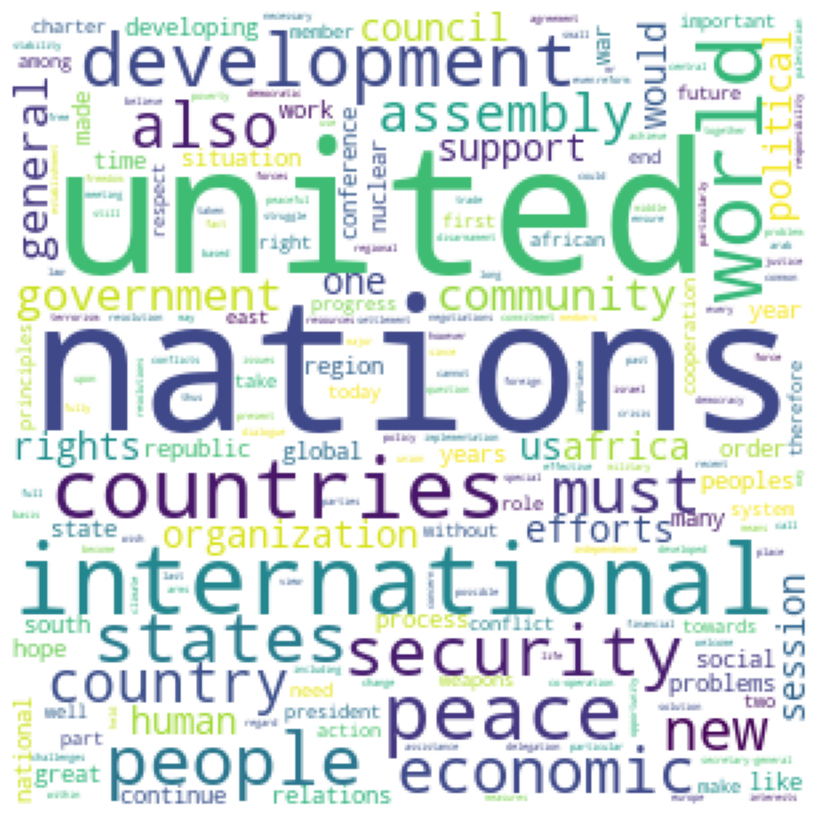

In [22]:
# Create a WordCloud object with specified parameters and fit it with word frequencies.
# Create a matplotlib figure for displaying the word cloud and show it.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [23]:
import numpy as np
# Define a function to compute IDF (Inverse Document Frequency) values for tokens in a DataFrame
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    # Define an inner function to update the counter with tokens from each document
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
     # Compute IDF values and add them to the DataFrame
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
# Compute IDF values for tokens in the 'tokens' column of the DataFrame df
idf_df = compute_idf(df)


In [24]:
# Multiply the frequency (freq) of each token by its corresponding IDF (idf) value to compute TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


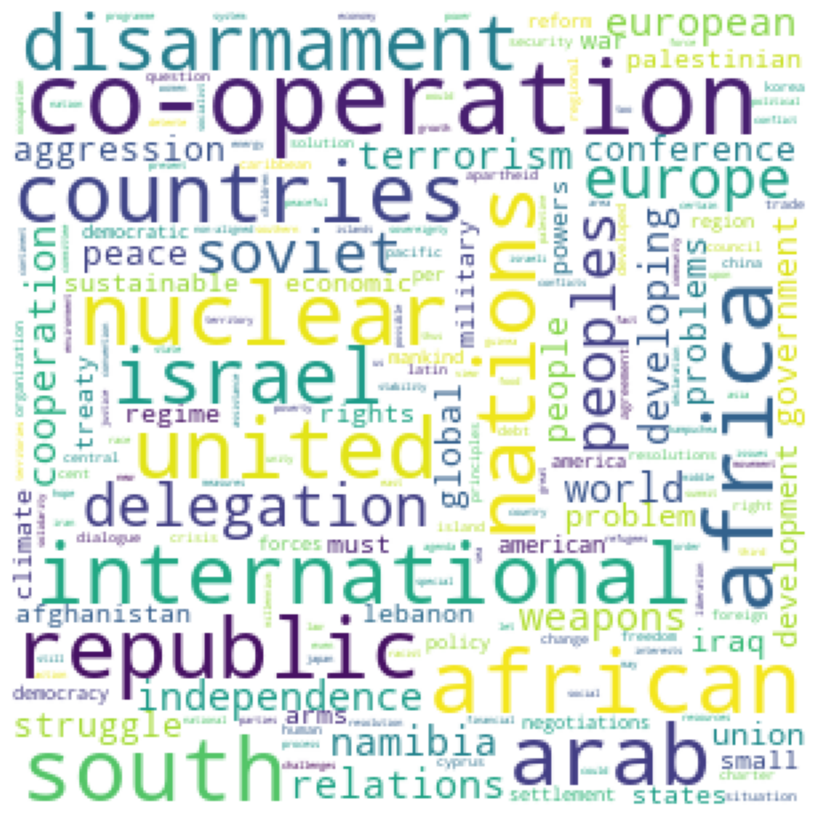

In [25]:
# Generate WordCloud with TF-IDF values
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
# Plot the WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [26]:
# Calculate the number of tokens
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [27]:
# Define a function to count the occurrences of keywords grouped by a specified column
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


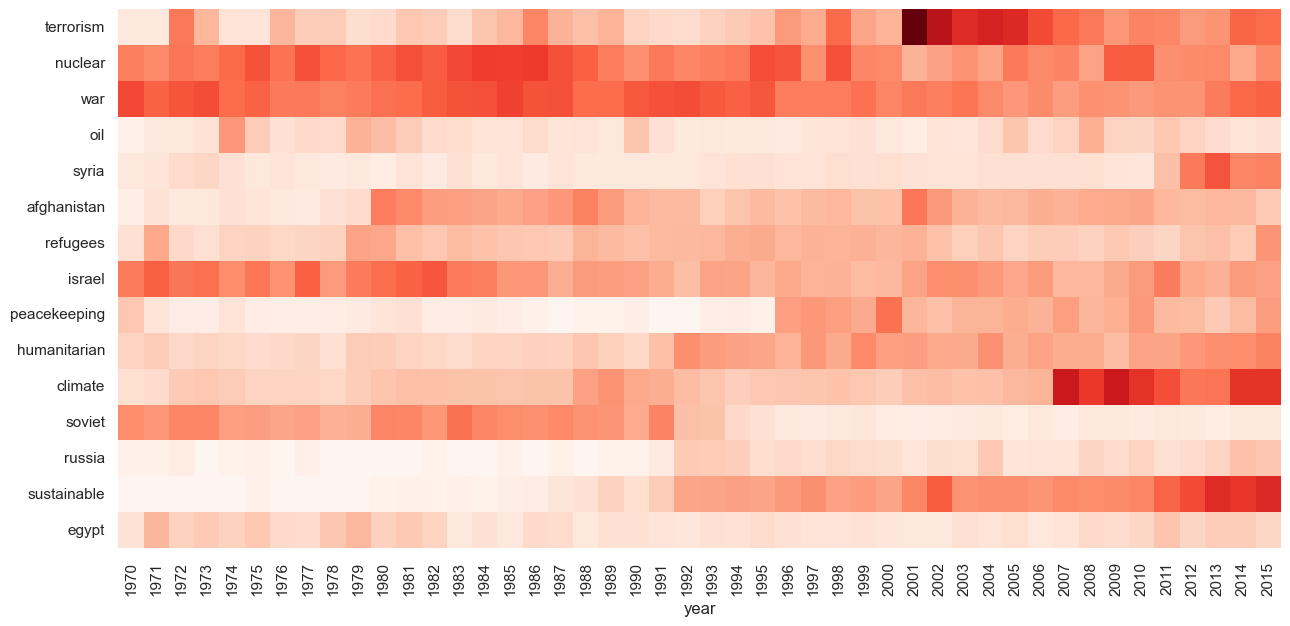

In [28]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
